# IMPORTING THE LIBRARIES:

In [206]:
import numpy as np      
import pandas as pd

# To visualizations
import matplotlib.pyplot as plt  
%matplotlib inline    
import seaborn as sns

#For date-time calculation
from datetime import datetime
from datetime import timedelta
import math # To get month




# for training and testing the model
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

# IMPORTING THE DATA

In [207]:
features = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")
train = pd.read_csv("train.csv")

In [208]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [209]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [210]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [211]:
features.describe() # from this we can identify there are null values present in some attributes

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [212]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [213]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


# MERGING THE DATASETS

In [214]:

# Creating the  dataset merging three dataset stores,features,train
df = train.merge(stores, on='Store', how='left')
df = df.merge(features, on=['Store', 'Date'], how='left')

In [215]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


# DATA CLEANING

In [216]:
# handling null values in markdown column

# Filling empty markdown columns
df['MarkDown4'] = df['MarkDown4'].fillna(0)
df['MarkDown5'] = df['MarkDown5'].fillna(0)
df['MarkDown1'] = df['MarkDown1'].fillna(0)
df['MarkDown2'] = df['MarkDown2'].fillna(0)
df['MarkDown3'] = df['MarkDown3'].fillna(0)


# Cleaning repeating column isholiday_x and isholiday_y
df['Holiday'] = df['IsHoliday_x']
df = df.drop(columns=['IsHoliday_x', 'IsHoliday_y'])

In [217]:
df.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Holiday
0,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


In [218]:
df.shape

(421570, 16)

# EXPLORATORY DATA ANALYSIS

In [219]:
df.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [220]:
df = df.loc[df['Weekly_Sales'] > 0]# delete the data having -ve values of weekly sales

In [221]:
df['Date'].head(10).append(df['Date'].tail(10)) # to see first and last 10 rows to see  the dataset is given for which dates.

0         2010-02-05
1         2010-02-12
2         2010-02-19
3         2010-02-26
4         2010-03-05
5         2010-03-12
6         2010-03-19
7         2010-03-26
8         2010-04-02
9         2010-04-09
421560    2012-08-24
421561    2012-08-31
421562    2012-09-07
421563    2012-09-14
421564    2012-09-21
421565    2012-09-28
421566    2012-10-05
421567    2012-10-12
421568    2012-10-19
421569    2012-10-26
Name: Date, dtype: object

So it is clear that data is in between 05-02-2010 to 26-10-2012

# NOW CHECK HOW THE WEEKLY SALES ARE AFFECTED BY HOLIDAYS:

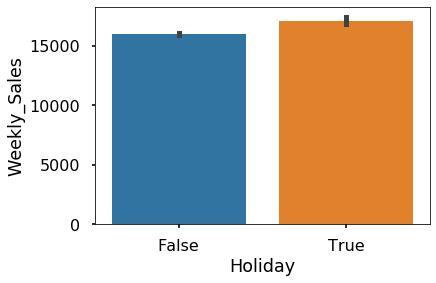

In [222]:
sns.barplot(x='Holiday', y='Weekly_Sales', data=df)

From this we can see that weekly sales are increased on holidays

Unique holiday dates are:

In [223]:
d_holiday = df.loc[df['Holiday']==True]
d_holiday['Date'].unique()

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

NOW WE CAN GROUP DATES INTO 4 GROUPS:
    GROUP 1:10 feb 2012,11 feb 2011,12 feb 2010
        
       this can be taken as super bowl day according to dataset information
        
    Group 2: 7 sep 2012, 09 sep 2011, 10 sep 2010  
    
        this can be taken as labour day
    Group 3:26 nov 2010, 25 nov 2011 
    
        this is termed as thanksgiving day
        
    Group 4: 31 dec 2010 ,30 dec 2011 This can be taken as new year eve or christmas holiday 
        according to dataset information given

In [224]:
# group 1 Super bowl dates in dataset
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'SuperBowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'SuperBowl'] = False

In [225]:
#  group 2 Labor day dates in dataset
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'LaborDay'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'LaborDay'] = False

In [226]:
# group 3 Thanksgiving dates in dataset
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Thanksgiving'] = False

In [227]:
# group 4 Christmas dates in train set
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas& New year'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas& New year'] = False

# WEEKLY SALES ON CHRISTMAS

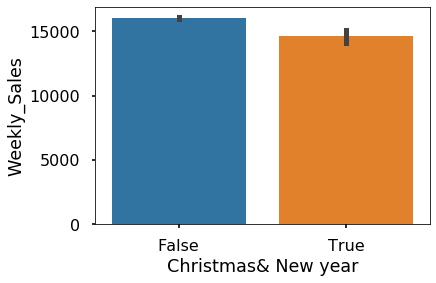

In [228]:
sns.barplot(x='Christmas& New year', y='Weekly_Sales', data=df)

# WEEKLY SALES ON SUPER BOWL

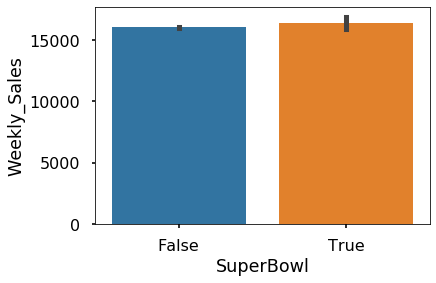

In [229]:
sns.barplot(x='SuperBowl', y='Weekly_Sales', data=df)

# WEEKLY SALES ON Thanksgiving day

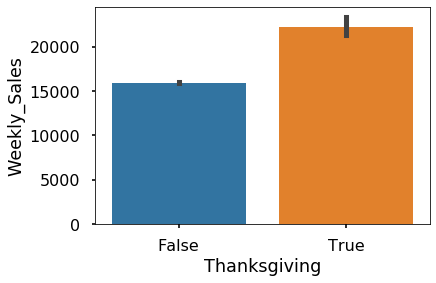

In [230]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=df)

# WEEKLY SALES ON LABOR DAY

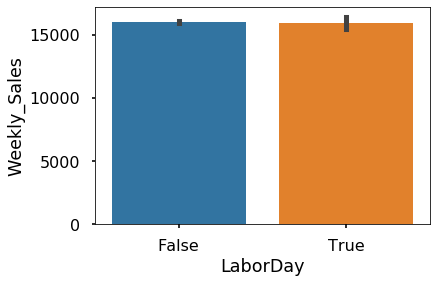

In [231]:
sns.barplot(x='LaborDay', y='Weekly_Sales', data=df)

From above, Labor Day and Christmas do not increase weekly average sales. 
There is positive effect on sales in Super bowl day, but the highest difference is in the Thanksgiving day.

In [232]:
df['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [233]:
df.groupby(['Christmas& New year','Type'])['Weekly_Sales'].mean() # effect on different types of christmas

Christmas& New year  Type
False                A       20174.350209
                     B       12301.986116
                     C        9570.951973
True                 A       18310.167535
                     B       11488.988057
                     C        8031.520607
Name: Weekly_Sales, dtype: float64

In [234]:
df.groupby(['Thanksgiving','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Thanksgiving

Thanksgiving  Type
False         A       20044.007801
              B       12197.717405
              C        9547.377807
True          A       27397.776346
              B       18733.973971
              C        9696.566616
Name: Weekly_Sales, dtype: float64

In [235]:
df.groupby(['SuperBowl','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Super Bowl

SuperBowl  Type
False      A       20138.055908
           B       12286.739293
           C        9536.110508
True       A       20612.757674
           B       12467.035506
           C       10179.271884
Name: Weekly_Sales, dtype: float64

In [236]:
df.groupby(['LaborDay','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Super Bowl

LaborDay  Type
False     A       20151.210941
          B       12294.954138
          C        9542.098293
True      A       20004.267422
          B       12084.304642
          C        9893.459258
Name: Weekly_Sales, dtype: float64

In [237]:
#df.groupby('Type').describe() to know the percentage of a,b,c types respectively

# CHART TO SHOW DIFFERENT TYPES OF STORE IN DATA

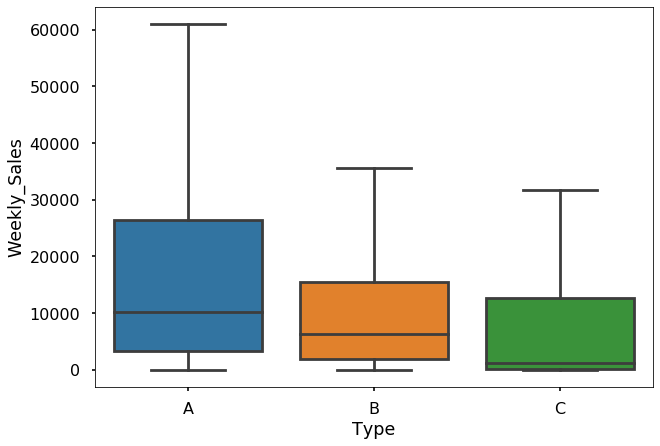

In [238]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Type', y='Weekly_Sales', data=df,showfliers = False)

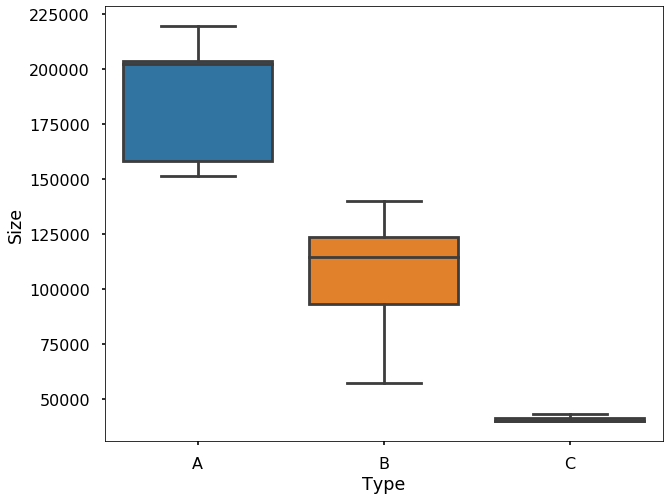

In [239]:
plt.figure(figsize=(10,8)) # To see the Relation between type-size
fig = sns.boxplot(x='Type', y='Size', data=df, showfliers=False)

The 'type' feature also seems to have a certain relationship with Weekly Sales. Type 'A' has a higher
sales median than types 'B' and 'C', in addition to a greater dispersion of sales values around 
this median. Type 'C' (transformed to '1') tends to have lower weekly sales.

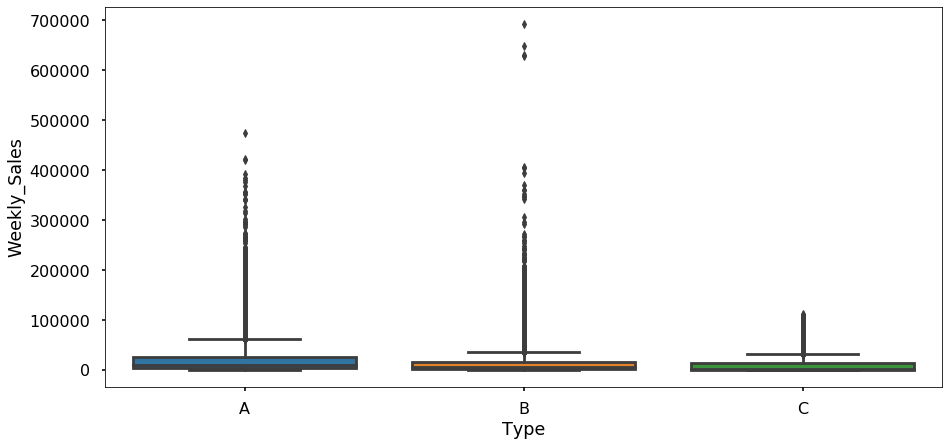

In [240]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='Type', y='Weekly_Sales', data=df,showfliers = True)

# Weekly_sales on the basis of Stores:

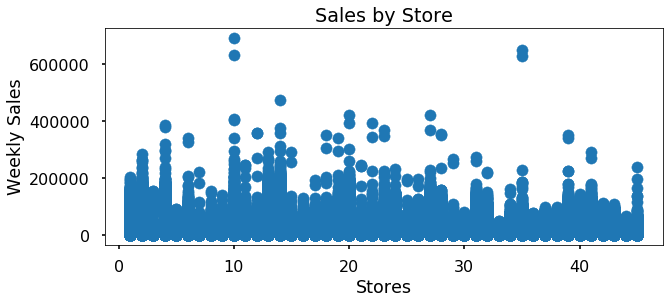

In [241]:
a = df['Store']
b = df['Weekly_Sales']
plt.figure(figsize=(10,4))
plt.title('Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(a,b)
plt.show()

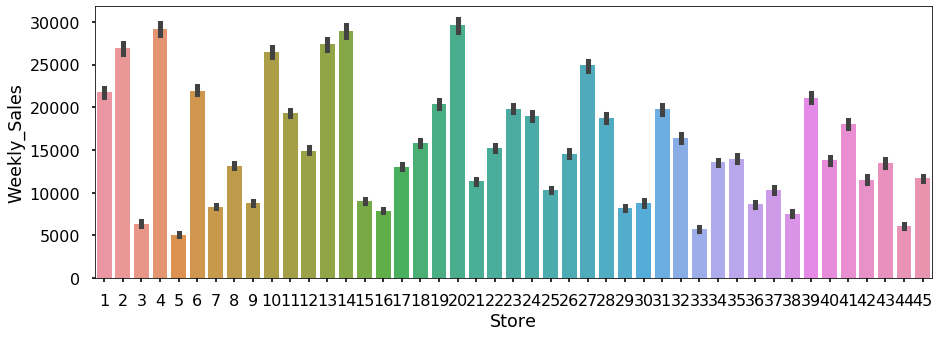

In [242]:
plt.figure(figsize=(15,5))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=df)

From these graph we conclude that  some stores has higher sales specificly average store 20 followed by 4 and 14 store.
Weekly sales by department are even more irregular, with departments with average sales ranging from 0 to more than 70000.
Despite this discrepancy in weekly sales by departament, this behavior seems to remain stable over the years. Some departaments 
showed a decrease in sales over the years, such as departaments 18, 65 and 73.

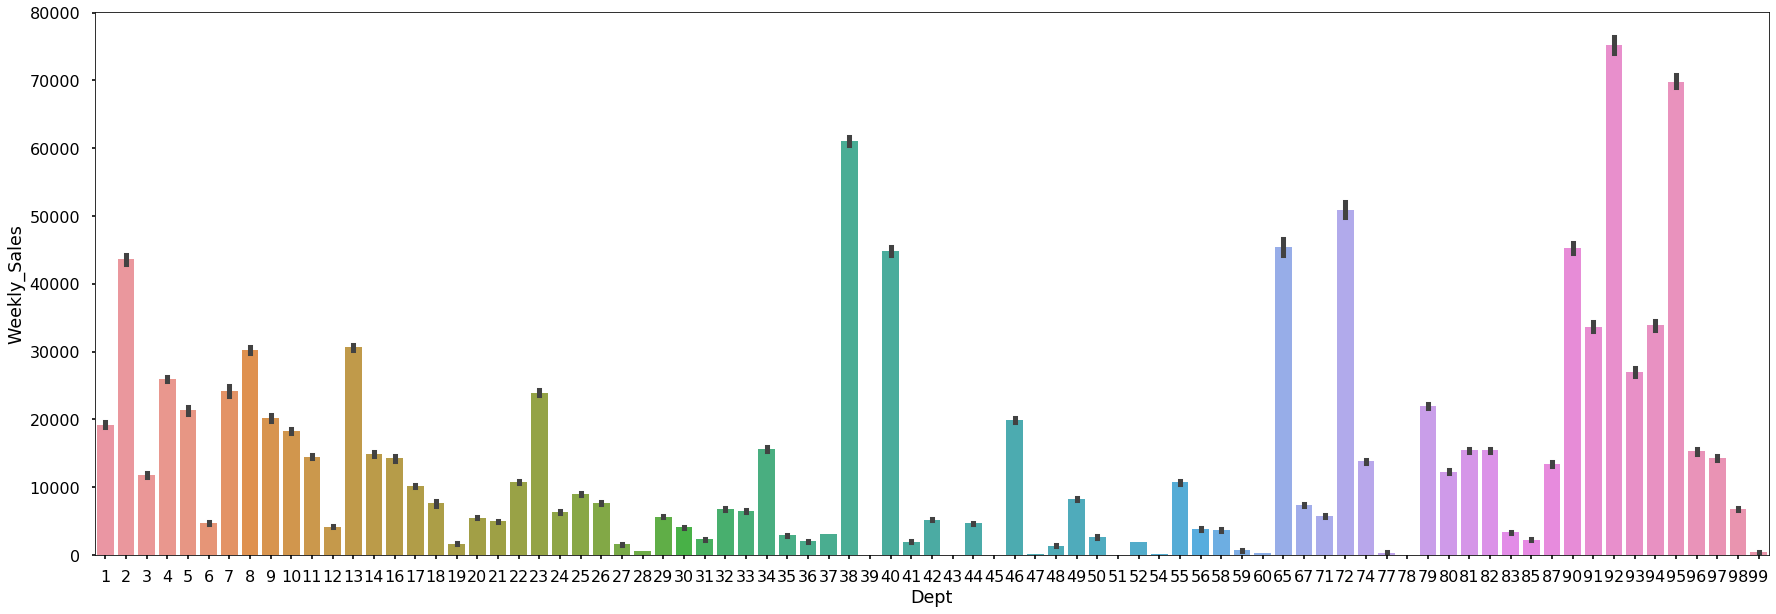

In [243]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=df)

92 has highest weekly sale doing department .Despite this discrepancy in weekly sales by departament,
this behavior seems to remain stable 
over the years. Some departaments showed a decrease in sales over the years, such as departaments 18, 65 and 73.

#  Effect of Fuel Price, CPI , Unemployment , Temperature on weekly sales 

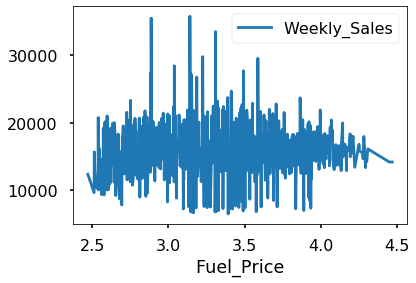

In [244]:
fprice = pd.pivot_table(df, values = "Weekly_Sales", index= "Fuel_Price")
fprice.plot()

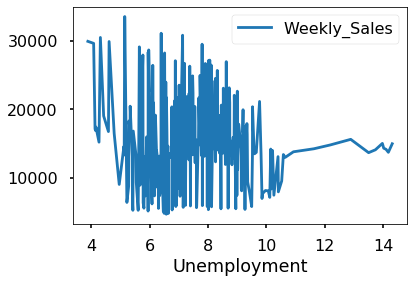

In [245]:

unemploy = pd.pivot_table(df, values = "Weekly_Sales", index= "Unemployment")
unemploy.plot()

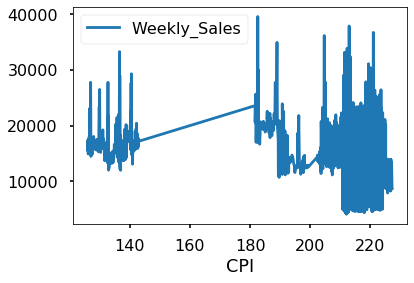

In [246]:
cpi = pd.pivot_table(df, values = "Weekly_Sales", index= "CPI")
cpi.plot()

there are no values for CPI between 140 to 180

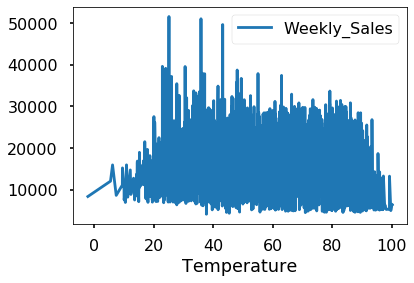

In [247]:
temperature = pd.pivot_table(df, values = "Weekly_Sales", index= "Temperature")
temperature.plot()

from these above graphs it is clear that there is no significant pattern in unemployment ,fuel price ,cpi,temperature on weekly sales

# EFFECT OF SIZE ON SALES

Text(0.5, 0, 'Size')

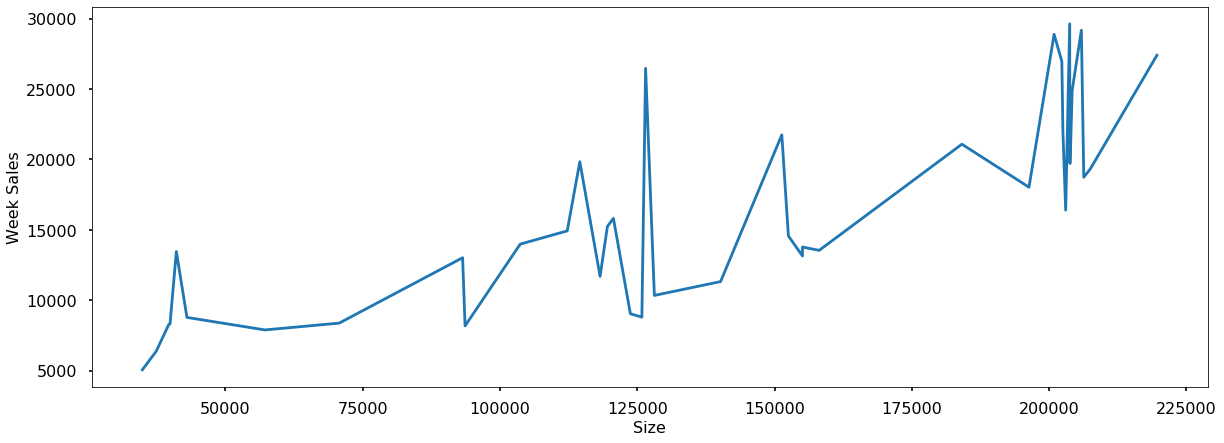

In [248]:
size = df.groupby(['Size']).agg({'Weekly_Sales': ['mean']})

plt.figure(figsize=(20, 7))
plt.plot(size)
plt.ylabel('Week Sales', fontsize=16)
plt.xlabel('Size', fontsize=16)


Grouping weekly sales by store size, the chart below seems to indicate a certain trend towards higher sales for larger stores.
However, this relationship is not  linear, and have  several cases contradicting this trend.

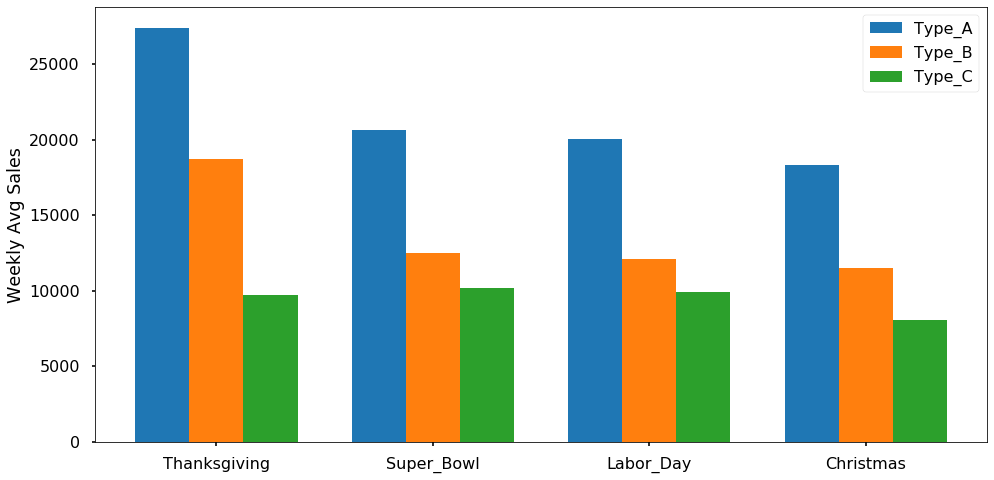

In [249]:
# Plotting avg wekkly sales according to holidays by types
plt.style.use('seaborn-poster')
labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas']
A_mean = [27397.77, 20612.75, 20004.26, 18310.16] # calculated above
B_mean = [18733.97, 12463.41, 12080.75, 11483.97] # calculated above
C_mean = [9696.56,10179.27,9893.45,8031.52]  # calculated above

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
r1 = ax.bar(x - width, A_mean, width, label='Type_A')
r2 = ax.bar(x , B_mean, width, label='Type_B')
r3 = ax.bar(x + width, C_mean, width, label='Type_C')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

It is seen from the graph that, highest sale average is in the Thanksgiving 
week between holidays. And, for all holidays Type A stores has highest sales.

# Conversion of date into week ,year,month

In [250]:
df["Date"] = pd.to_datetime(df["Date"]) # convert to datetime
df['week'] =df['Date'].dt.week
df['month'] =df['Date'].dt.month 
df['year'] =df['Date'].dt.year

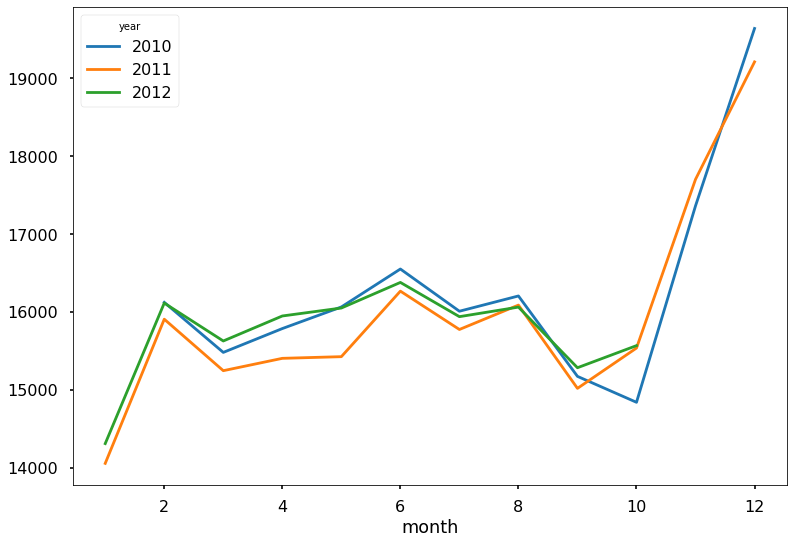

In [251]:
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()

From the graph, it is seen that 2011 has lower sales than 2010 generally. 
When we look at the mean sales it is seen that 2010 has higher values, 
but 2012 has no information about November and December which have higher sales.

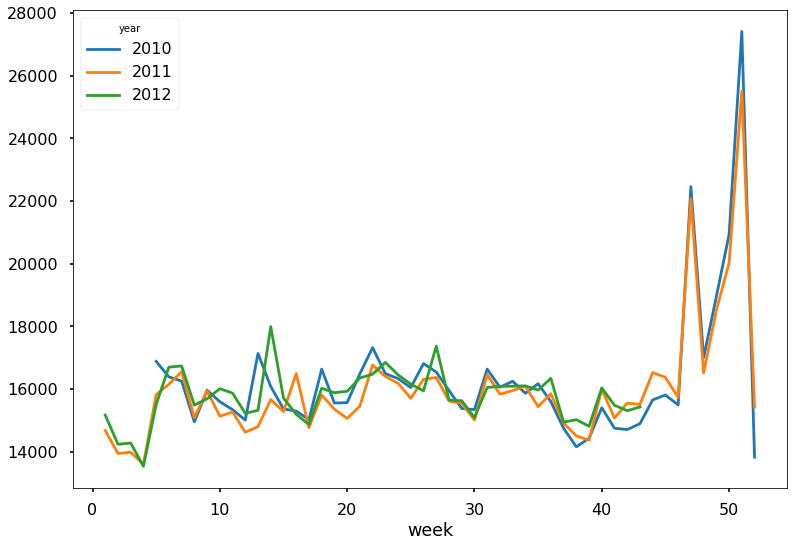

In [252]:
weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "week")
weekly_sales.plot()

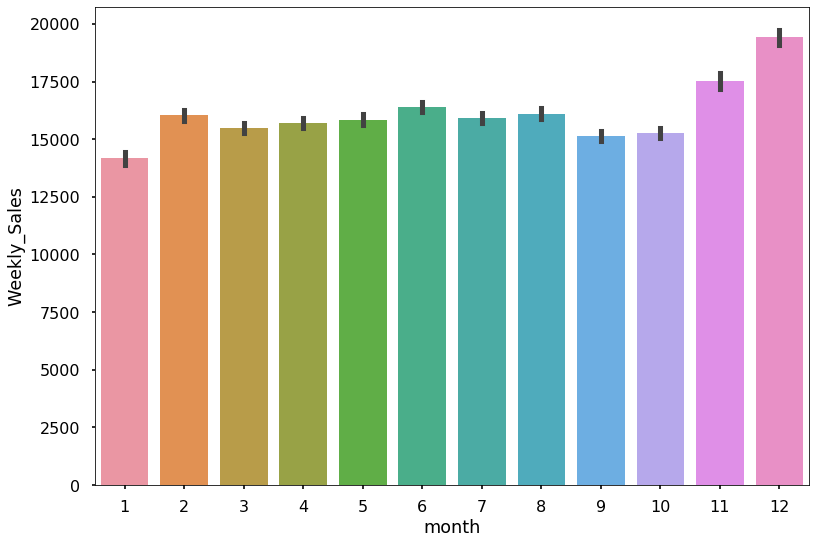

In [253]:
fig = sns.barplot(x='month', y='Weekly_Sales', data=df)

When we look at the graph above, the best sales are in December and November, as expected. The highest values are belongs to Thankgiving holiday
but when we take average it is obvious that December has the best value.

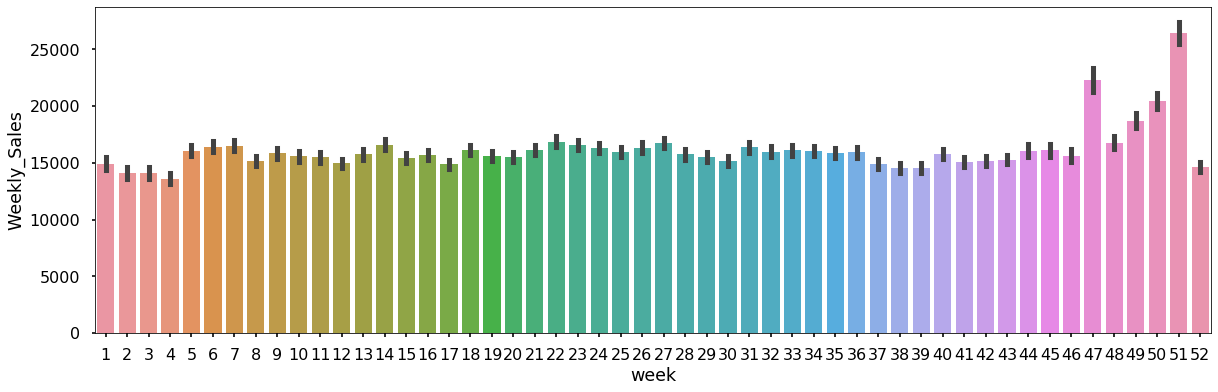

In [254]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='week', y='Weekly_Sales', data=df)

From graphs, it is seen that 51th week and 47th weeks have significantly higher 
averages as Christmas, Thankgiving and Black Friday effects

In [255]:
data=df

In [256]:
data.dtypes


Store                           int64
Dept                            int64
Date                   datetime64[ns]
Weekly_Sales                  float64
Type                           object
Size                            int64
Temperature                   float64
Fuel_Price                    float64
MarkDown1                     float64
MarkDown2                     float64
MarkDown3                     float64
MarkDown4                     float64
MarkDown5                     float64
CPI                           float64
Unemployment                  float64
Holiday                          bool
SuperBowl                      object
LaborDay                       object
Thanksgiving                   object
Christmas& New year            object
week                            int64
month                           int64
year                            int64
dtype: object

change of holidays boolean values to 0-1 and replace type of the stores from A, B, C to 1, 2, 3. changing T,F to 0-1 in superbowl,thanksgiving,christmas& new year,laborday

In [257]:
type_group = {'A':1, 'B': 2, 'C': 3}  # changing A,B,C to 1-2-3
data['Type'] = data['Type'].replace(type_group)

In [258]:
data['SuperBowl'] = data['SuperBowl'].astype(bool).astype(int) # changing T,F to 0-1

In [259]:

data['Thanksgiving'] = data['Thanksgiving'].astype(bool).astype(int) # changing T,F to 0-1

In [260]:
data['LaborDay'] = data['LaborDay'].astype(bool).astype(int) # changing T,F to 0-1

In [261]:
data['Christmas& New year'] = data['Christmas& New year'].astype(bool).astype(int) # changing T,F to 0-1

In [262]:
data['Holiday'] = data['Holiday'].astype(bool).astype(int) # changing T,F to 0-1

In [263]:
newdata=data

In [264]:
newdata.dtypes

Store                           int64
Dept                            int64
Date                   datetime64[ns]
Weekly_Sales                  float64
Type                            int64
Size                            int64
Temperature                   float64
Fuel_Price                    float64
MarkDown1                     float64
MarkDown2                     float64
MarkDown3                     float64
MarkDown4                     float64
MarkDown5                     float64
CPI                           float64
Unemployment                  float64
Holiday                         int32
SuperBowl                       int32
LaborDay                        int32
Thanksgiving                    int32
Christmas& New year             int32
week                            int64
month                           int64
year                            int64
dtype: object

# CREATION OF CORRELATION MATRIX:

In [265]:

drop_col = ['SuperBowl','LaborDay','Thanksgiving','Christmas& New year']
newdata.drop(drop_col, axis=1, inplace=True)

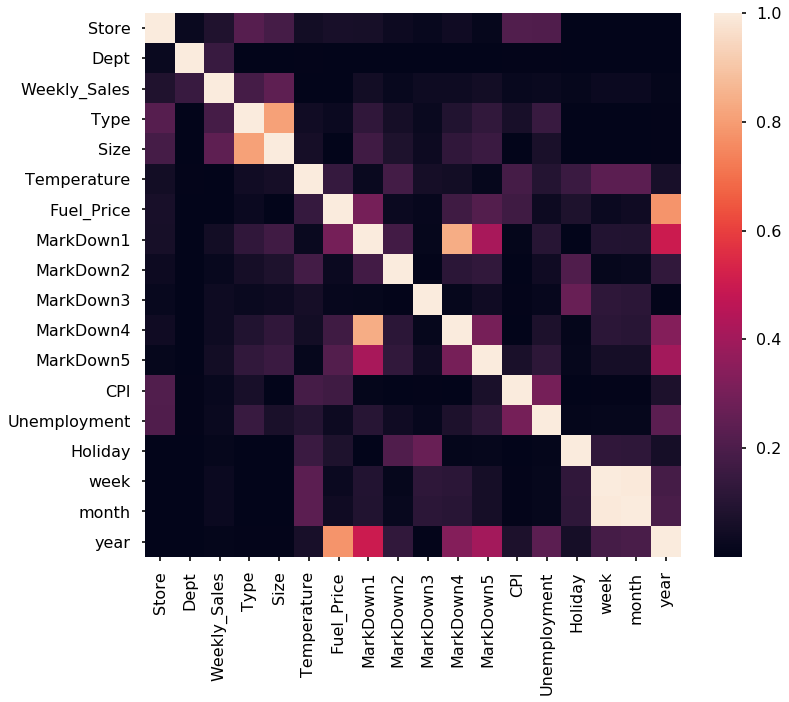

In [266]:
plt.figure(figsize = (12,10))
sns.heatmap(newdata.corr().abs())    # To see the correlations
plt.show()


Temperature, unemployment, CPI have no significant effect on weekly sales,drop them. Also, Markdown 4 and 5 highly correlated with Markdown 1. So, drop them also.

CORRELATION MATRIX AFTER DROPING NON SIGNIFICANT ATTRIBUTES:

In [267]:
drop_col = ['Temperature','MarkDown4','MarkDown5','CPI','Unemployment']
newdata.drop(drop_col, axis=1, inplace=True)

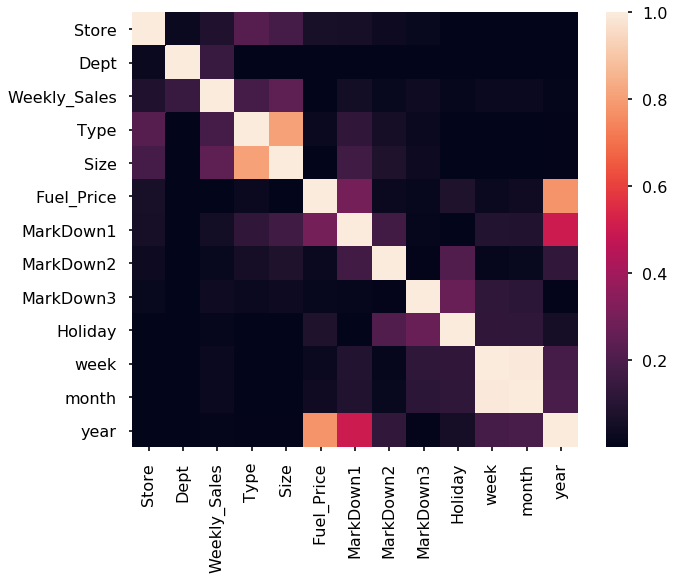

In [268]:
plt.figure(figsize = (10,8))
sns.heatmap(newdata.corr().abs())    # to check corelation again
plt.show()

In [269]:
newdata = newdata.sort_values(by='Date', ascending=True)


# TRAINING THE DATA

RANDOM FOREST IN FIRST TRIAL:

In [270]:
train_data = newdata[:int(0.7*(len(newdata)))] # taking train part
test_data = newdata[int(0.7*(len(newdata))):] # taking test part

target = "Weekly_Sales"
used_cols = [c for c in newdata.columns.to_list() if c not in [target]] # all columns except weekly sales

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

In [271]:
X = newdata[used_cols]# to keep train and test X values together

In [272]:

X_train = X_train.drop(['Date'], axis=1) # dropping date from train
X_test = X_test.drop(['Date'], axis=1) # dropping date from test

# CALCULATE THE WEIGHED ERROR

In [273]:
def WEIGHED_test(test, pred): # WMAE for test 
    weights = X_test['Holiday'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error

In [274]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

scaler=preprocessing.RobustScaler()

#making pipe tp use scaler and regressor together
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train, y_train)

# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

In [275]:
WEIGHED_test(y_test, y_pred_test)

5718.14090557352

In [276]:
pipe.score(X_test,y_test)

0.8430281208884529

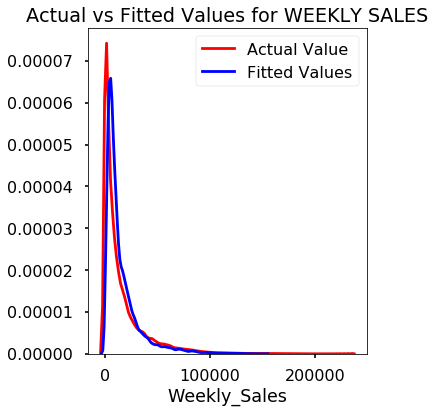

In [289]:
plt.figure(figsize=(5, 6))
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_test, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for WEEKLY SALES')
plt.show()
plt.close()

# FEATURE IMPORTANCE

In [278]:
X = X.drop(['Date'], axis=1) #dropping date column from X

Feature ranking:


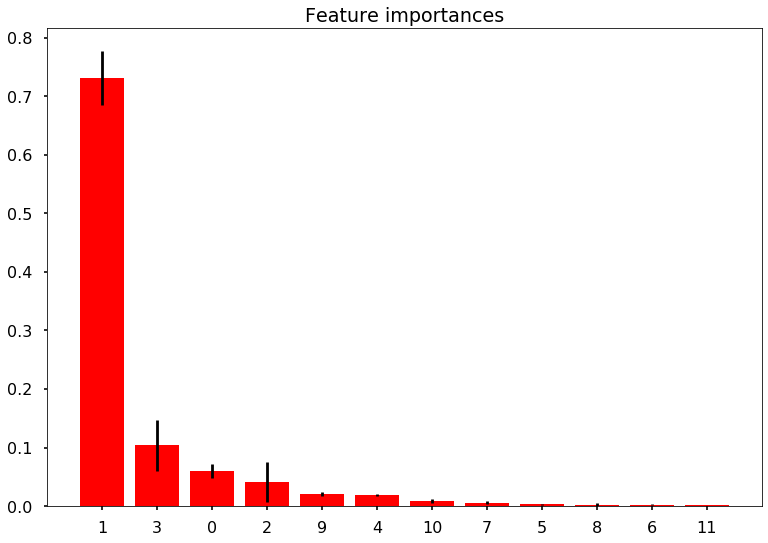

In [279]:
imp = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(imp)[::-1]

# Printing the feature ranking
print("Feature ranking:")


# Plotting the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), imp[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

DROP MONTH WHICH IS HIGHLY CORELATED TO WEEK

In [280]:
X1_train = X_train.drop(['month'], axis=1) # dropping month
X1_test = X_test.drop(['month'], axis=1)

# AGAIN MODEL THE DATA WITHOUT MONTH COLUMN

VALUE OF WMAE AFTER TRAINING AND TESTING THE MODEL:

In [281]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

scaler=preprocessing.RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X1_train, y_train)

# predictions on train set
y_pred = pipe.predict(X1_train)

# predictions on test set
y_pred_test = pipe.predict(X1_test)

In [282]:

WEIGHED_test(y_test, y_pred_test)

5560.6787032035145

It gives better results than above

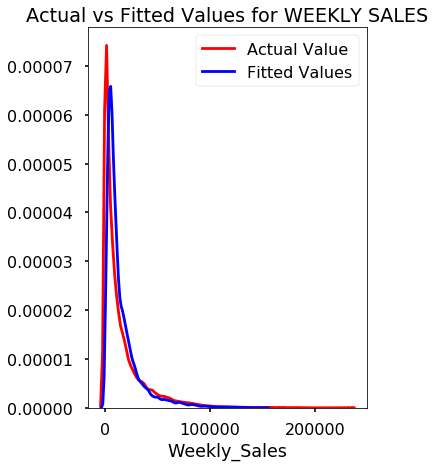

In [283]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_test, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for WEEKLY SALES')


plt.show()
plt.close()

In [284]:
pipe.score(X1_test,y_test)

0.8538319865267363

# Feature importance in whole dataset

In [285]:
# splitting train-test to whole dataset
train_data_enc = data[:int(0.7*(len(data)))]
test_data_enc = data[int(0.7*(len(data))):]

#target = "Weekly_Sales"
used_cols1 = [c for c in data.columns.to_list() if c not in [target]] # all columns except price

X_train_enc = train_data_enc[used_cols1]
X_test_enc = test_data_enc[used_cols1]
y_train_enc = train_data_enc[target]
y_test_enc = test_data_enc[target]

X_enc = data[used_cols1] # to get together train,test splits

X_enc = X_enc.drop(['Date'], axis=1)

In [286]:
X_train_enc = X_train_enc.drop(['Date'], axis=1) # dropping date from train and test
X_test_enc= X_test_enc.drop(['Date'], axis=1)

In [287]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

scaler=preprocessing.RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train_enc, y_train_enc)

# predictions on train set
y_pred_enc = pipe.predict(X_train_enc)

# predictions on test set
y_pred_test_enc = pipe.predict(X_test_enc)

VALUE OF WMAE IN THIS MODEL:

In [288]:

WEIGHED_test(y_test_enc, y_pred_test_enc)

1974.7539024136197

FROM THIS WE CAN SEE THAT WHEN WE TAKE WHOLE DATA WITH FEATURE SELECTION OUR MODEL GIVES THE BEST RESULTS.